In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data=pd.read_csv('car data.csv')


print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


Dataset Overview
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset shape: (301, 9)

Column names:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Data types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Se

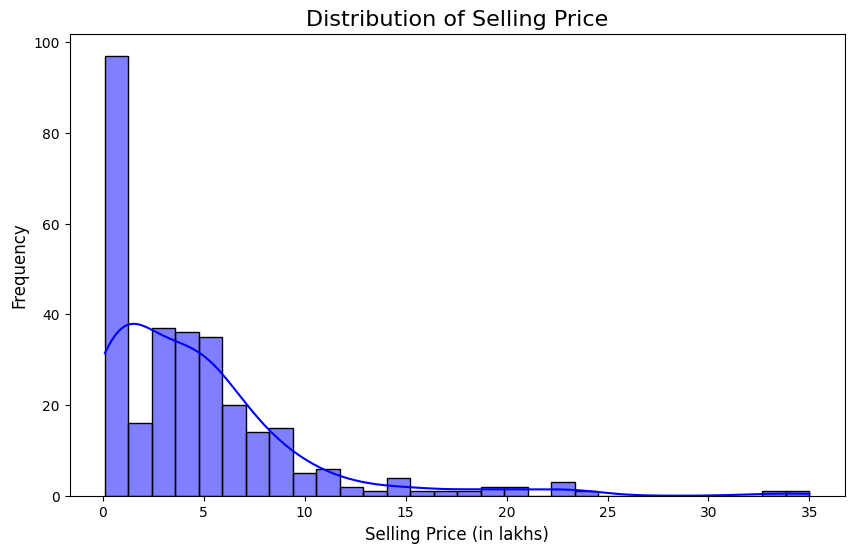


Car Age statistics:
count    301.000000
mean      11.372093
std        2.891554
min        7.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       22.000000
Name: Car_Age, dtype: float64


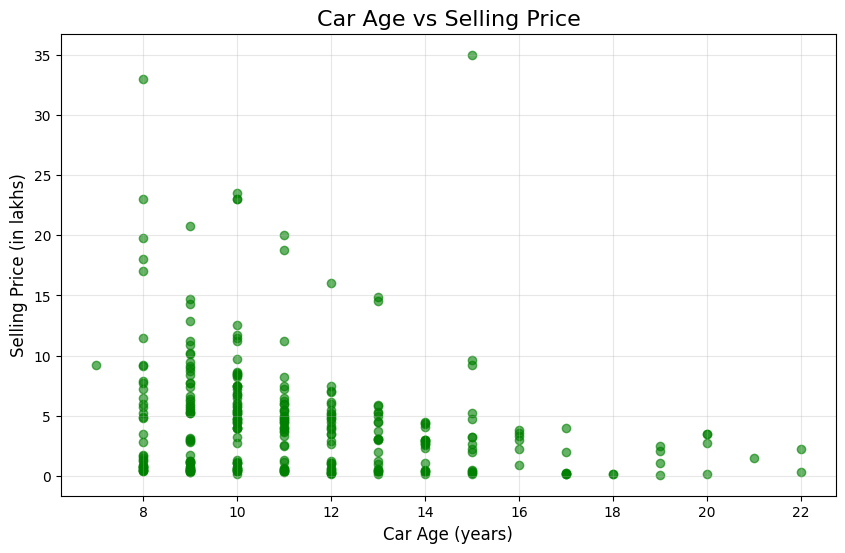

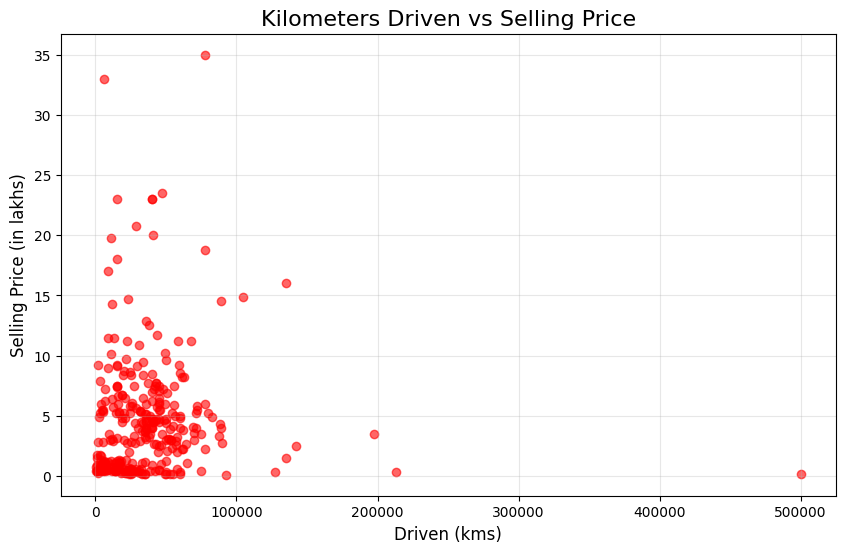

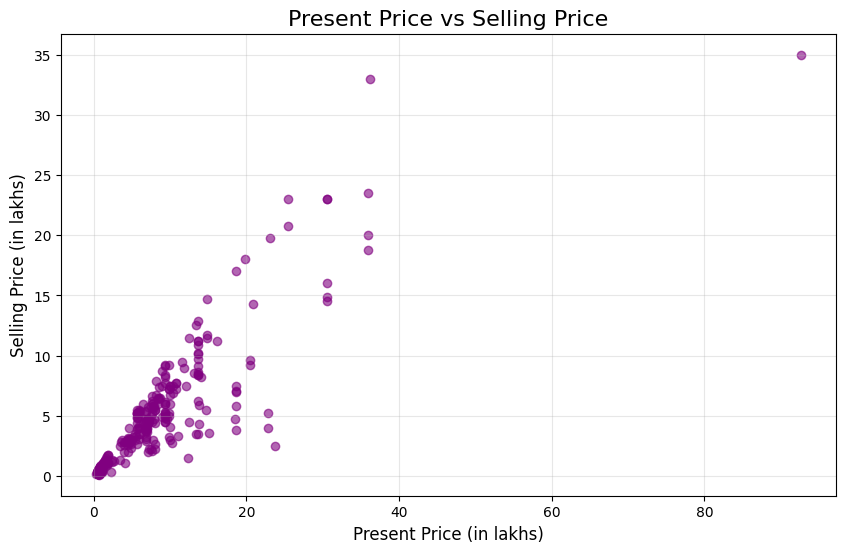

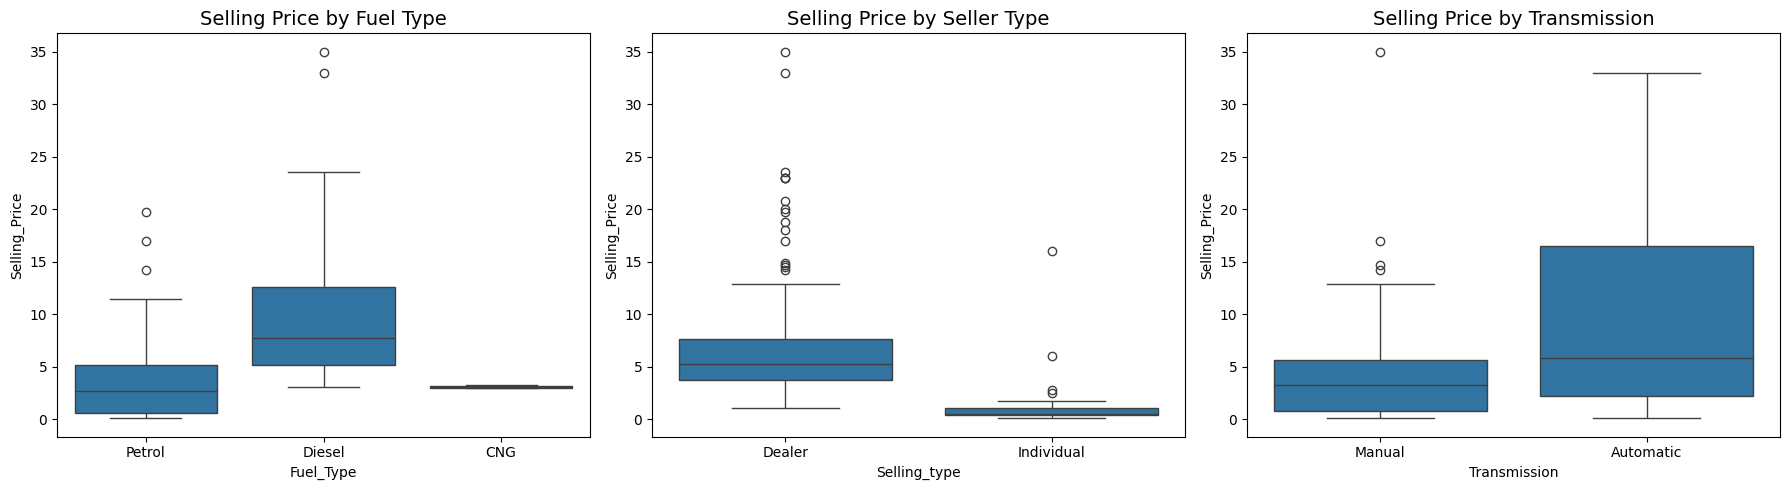


Dataset after preprocessing:
   Selling_Price  Present_Price  Driven_kms  Selling_type  Transmission  \
0           3.35           5.59       27000             0             1   
1           4.75           9.54       43000             0             1   
2           7.25           9.85        6900             0             1   
3           2.85           4.15        5200             0             1   
4           4.60           6.87       42450             0             1   

   Owner  Car_Age  Fuel_Type_Diesel  Fuel_Type_Petrol  
0      0       11             False              True  
1      0       12              True             False  
2      0        8             False              True  
3      0       14             False              True  
4      0       11              True             False  

New shape: (301, 9)

Final columns: ['Selling_Price', 'Present_Price', 'Driven_kms', 'Selling_type', 'Transmission', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


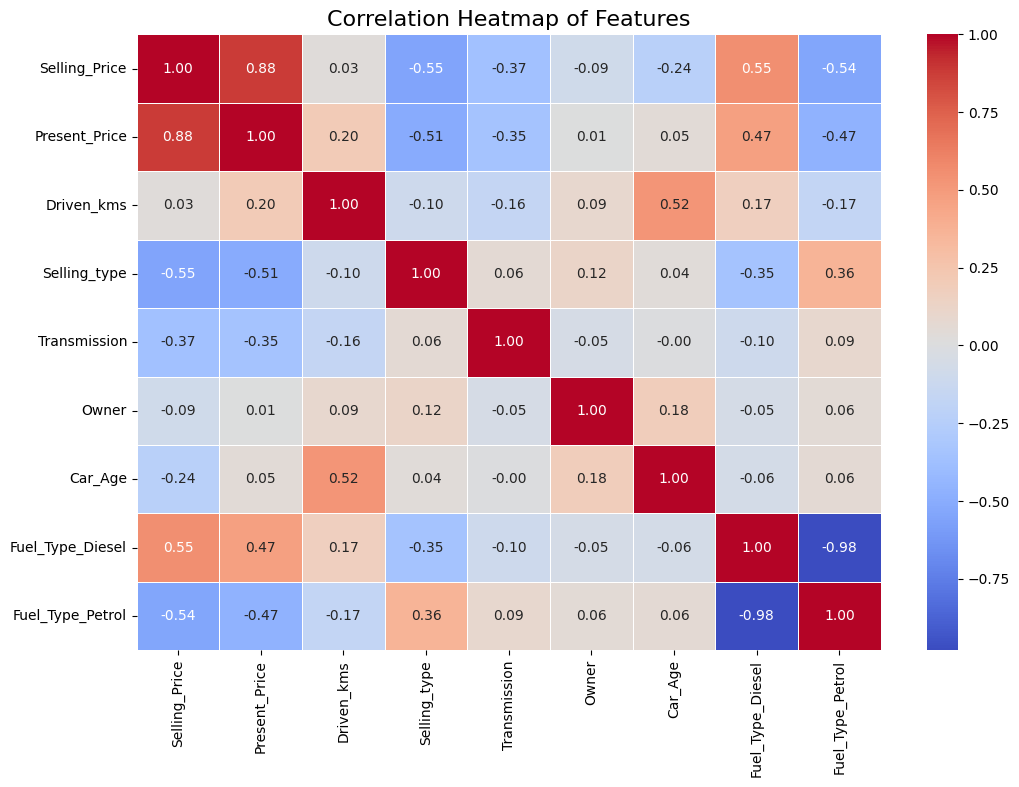


Correlation with Selling Price:
Selling_Price       1.000000
Present_Price       0.878914
Fuel_Type_Diesel    0.552339
Driven_kms          0.029187
Owner              -0.088344
Car_Age            -0.236141
Transmission       -0.367128
Fuel_Type_Petrol   -0.540571
Selling_type       -0.550724
Name: Selling_Price, dtype: float64

Features shape: (301, 8)
Target shape: (301,)

Training set size: (240, 8)
Testing set size: (61, 8)

Data preprocessing complete!

Starting model training...

1. Training Linear Regression...
Linear Regression - R2 Score: 0.8488707839193137

2. Training Ridge Regression...
Ridge Regression - R2 Score: 0.8483973683280701

3. Training Lasso Regression...
Lasso Regression - R2 Score: 0.8444390475164797

4. Training Decision Tree...
Decision Tree - R2 Score: 0.9483555206279581

5. Training Random Forest...
Random Forest - R2 Score: 0.9636914890116812

6. Training Gradient Boosting...
Gradient Boosting - R2 Score: 0.9635692484373712

MODEL EVALUATION RESULTS
      

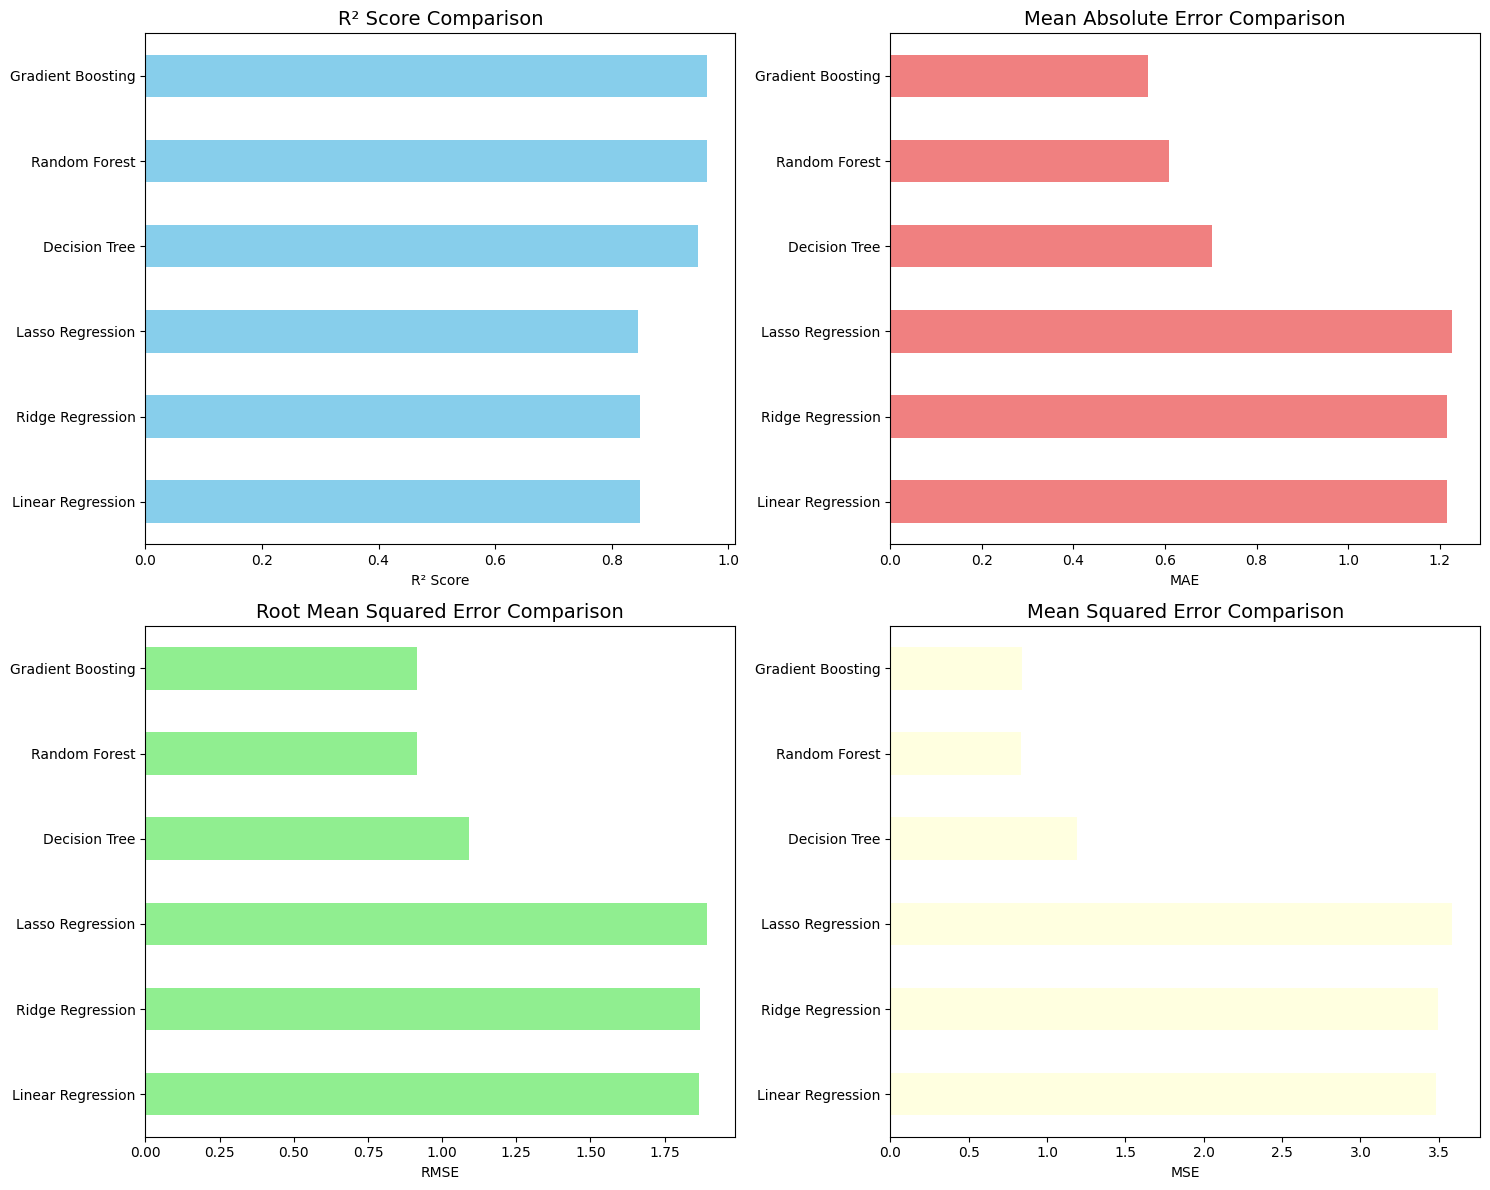

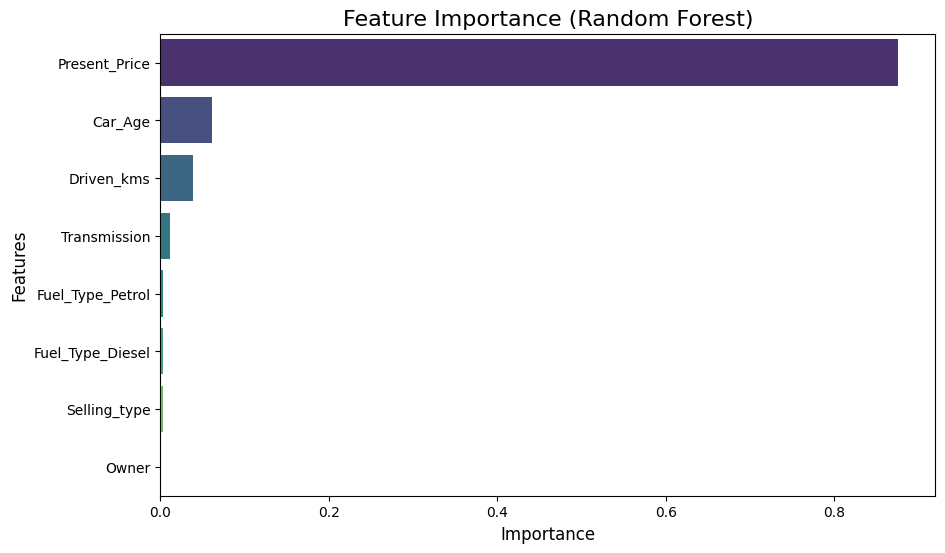


Feature Importance (Random Forest):
            Feature  Importance
0     Present_Price    0.876025
5           Car_Age    0.061617
1        Driven_kms    0.038910
3      Transmission    0.011887
7  Fuel_Type_Petrol    0.003680
6  Fuel_Type_Diesel    0.003407
2      Selling_type    0.003158
4             Owner    0.001316


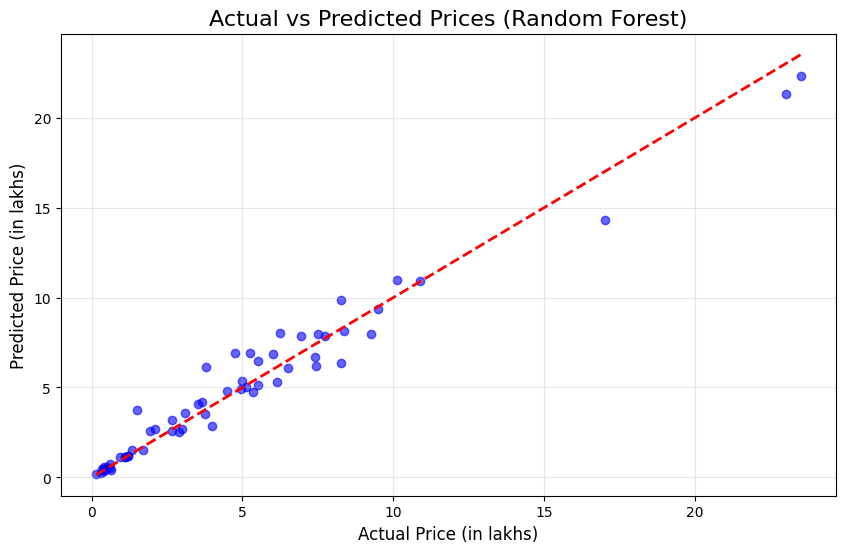

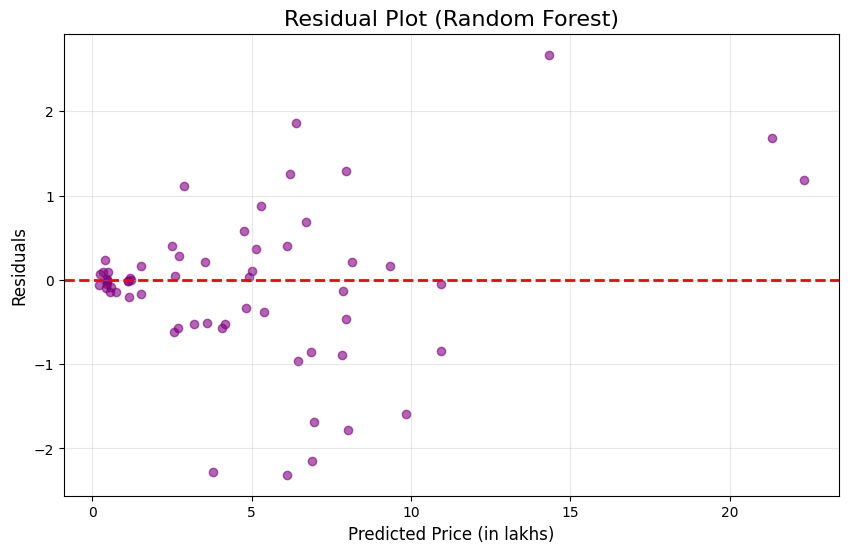

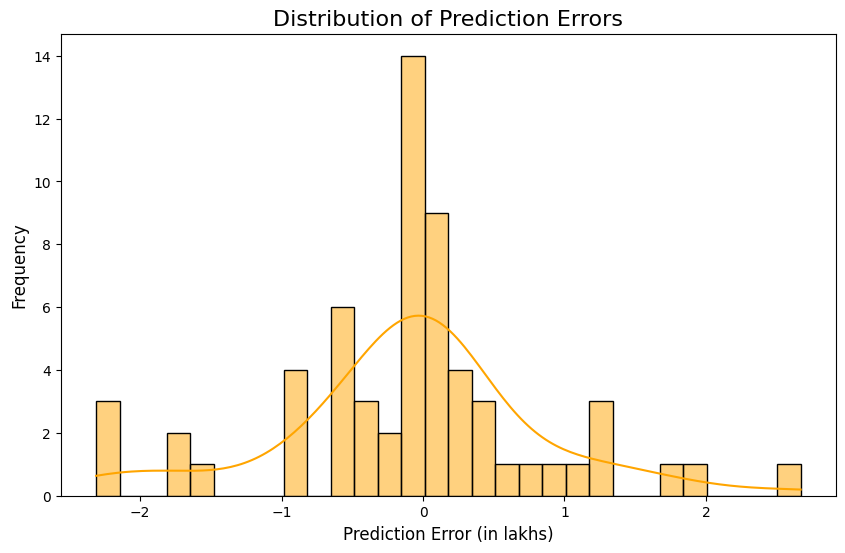


Project Complete!

Key Insights:
1. The best performing model is Random Forest with R² score of 0.9637
2. Most important feature: Present_Price
3. Average prediction error (MAE): 0.61 lakhs

4. Real-world applications:
   - Car dealers can use this to set competitive prices
   - Buyers can verify if a car price is fair
   - Insurance companies can estimate car values
   - Banks can assess loan amounts for used cars


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('car data.csv')

print("Dataset Overview")
print(data.head())
print("\nDataset shape:", data.shape)
print("\nColumn names:")
print(data.columns.tolist())
print("\nData types:")
print(data.dtypes)

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(data.describe())

# Check unique values in categorical columns
print("\nUnique Fuel Types:", data['Fuel_Type'].unique())
print("Fuel Type counts:")
print(data['Fuel_Type'].value_counts())

print("\nUnique Selling Types:", data['Selling_type'].unique())
print("Selling Type counts:")
print(data['Selling_type'].value_counts())

print("\nUnique Transmissions:", data['Transmission'].unique())
print("Transmission counts:")
print(data['Transmission'].value_counts())

print("\nOwner counts:")
print(data['Owner'].value_counts())

# Visualize the target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price (in lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Create Car Age feature
current_year = 2025
data['Car_Age'] = current_year - data['Year']

print("\nCar Age statistics:")
print(data['Car_Age'].describe())

# Visualize Car Age vs Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Car_Age'], data['Selling_Price'], alpha=0.6, color='green')
plt.title('Car Age vs Selling Price', fontsize=16)
plt.xlabel('Car Age (years)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Visualize Driven kms vs Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Driven_kms'], data['Selling_Price'], alpha=0.6, color='red')
plt.title('Kilometers Driven vs Selling Price', fontsize=16)
plt.xlabel('Driven (kms)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Visualize Present Price vs Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Present_Price'], data['Selling_Price'], alpha=0.6, color='purple')
plt.title('Present Price vs Selling Price', fontsize=16)
plt.xlabel('Present Price (in lakhs)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Box plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, ax=axes[0])
axes[0].set_title('Selling Price by Fuel Type', fontsize=14)

sns.boxplot(x='Selling_type', y='Selling_Price', data=data, ax=axes[1])
axes[1].set_title('Selling Price by Seller Type', fontsize=14)

sns.boxplot(x='Transmission', y='Selling_Price', data=data, ax=axes[2])
axes[2].set_title('Selling Price by Transmission', fontsize=14)

plt.tight_layout()
plt.show()

# Encode categorical variables
# One-hot encoding for Fuel_Type
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# Label encoding for Selling_type and Transmission
label_encoder = LabelEncoder()
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# Drop unnecessary columns
data = data.drop(columns=['Car_Name', 'Year'])

print("\nDataset after preprocessing:")
print(data.head())
print("\nNew shape:", data.shape)
print("\nFinal columns:", data.columns.tolist())

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

# Feature importance from correlation with target
print("\nCorrelation with Selling Price:")
print(correlation_matrix['Selling_Price'].sort_values(ascending=False))

# Separate features and target
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing complete!")
print("\nStarting model training...")

# Dictionary to store model results
results = {}

# 1. Linear Regression
print("\n1. Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

results['Linear Regression'] = {
    'R2 Score': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}
print("Linear Regression - R2 Score:", results['Linear Regression']['R2 Score'])

# 2. Ridge Regression
print("\n2. Training Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

results['Ridge Regression'] = {
    'R2 Score': r2_score(y_test, y_pred_ridge),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge))
}
print("Ridge Regression - R2 Score:", results['Ridge Regression']['R2 Score'])

# 3. Lasso Regression
print("\n3. Training Lasso Regression...")
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

results['Lasso Regression'] = {
    'R2 Score': r2_score(y_test, y_pred_lasso),
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
}
print("Lasso Regression - R2 Score:", results['Lasso Regression']['R2 Score'])

# 4. Decision Tree
print("\n4. Training Decision Tree...")
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

results['Decision Tree'] = {
    'R2 Score': r2_score(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt))
}
print("Decision Tree - R2 Score:", results['Decision Tree']['R2 Score'])

# 5. Random Forest
print("\n5. Training Random Forest...")
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

results['Random Forest'] = {
    'R2 Score': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
}
print("Random Forest - R2 Score:", results['Random Forest']['R2 Score'])

# 6. Gradient Boosting
print("\n6. Training Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

results['Gradient Boosting'] = {
    'R2 Score': r2_score(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb))
}
print("Gradient Boosting - R2 Score:", results['Gradient Boosting']['R2 Score'])

# Display all results
print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)
results_df = pd.DataFrame(results).T
print(results_df)

# Find best model
best_model_name = results_df['R2 Score'].idxmax()
print(f"\nBest Model: {best_model_name}")
print(f"R2 Score: {results_df.loc[best_model_name, 'R2 Score']:.4f}")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

results_df['R2 Score'].plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('R² Score Comparison', fontsize=14)
axes[0, 0].set_xlabel('R² Score')

results_df['MAE'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Mean Absolute Error Comparison', fontsize=14)
axes[0, 1].set_xlabel('MAE')

results_df['RMSE'].plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Root Mean Squared Error Comparison', fontsize=14)
axes[1, 0].set_xlabel('RMSE')

results_df['MSE'].plot(kind='barh', ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Mean Squared Error Comparison', fontsize=14)
axes[1, 1].set_xlabel('MSE')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

print("\nFeature Importance (Random Forest):")
print(feature_importance_rf)

# Actual vs Predicted plot for best model (using Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Random Forest)', fontsize=16)
plt.xlabel('Actual Price (in lakhs)', fontsize=12)
plt.ylabel('Predicted Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot (Random Forest)', fontsize=16)
plt.xlabel('Predicted Price (in lakhs)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Prediction Error (in lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("\nProject Complete!")
print("\nKey Insights:")
print(f"1. The best performing model is {best_model_name} with R² score of {results_df.loc[best_model_name, 'R2 Score']:.4f}")
print(f"2. Most important feature: {feature_importance_rf.iloc[0]['Feature']}")
print(f"3. Average prediction error (MAE): {results_df.loc[best_model_name, 'MAE']:.2f} lakhs")
print("\n4. Real-world applications:")
print("   - Car dealers can use this to set competitive prices")
print("   - Buyers can verify if a car price is fair")
print("   - Insurance companies can estimate car values")
print("   - Banks can assess loan amounts for used cars")

Dataset Overview
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset shape: (301, 9)

Column names:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Data types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Se

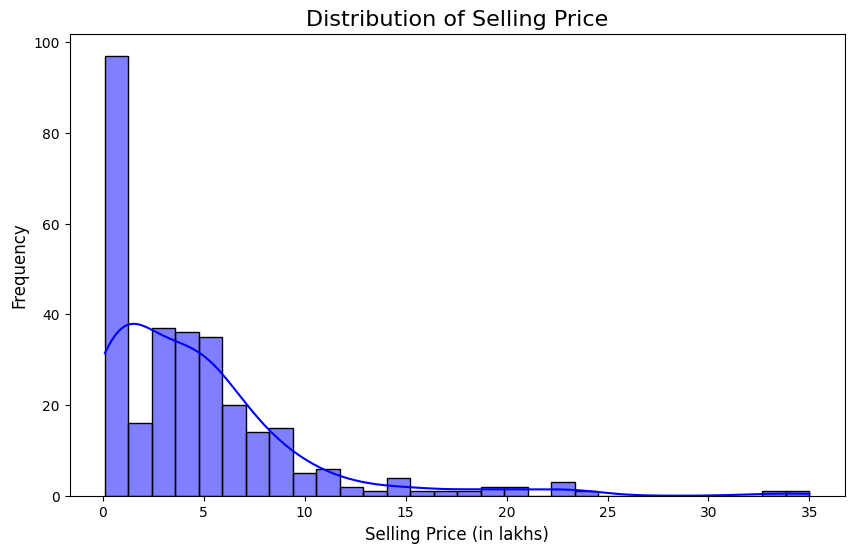


Car Age statistics:
count    301.000000
mean      11.372093
std        2.891554
min        7.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       22.000000
Name: Car_Age, dtype: float64


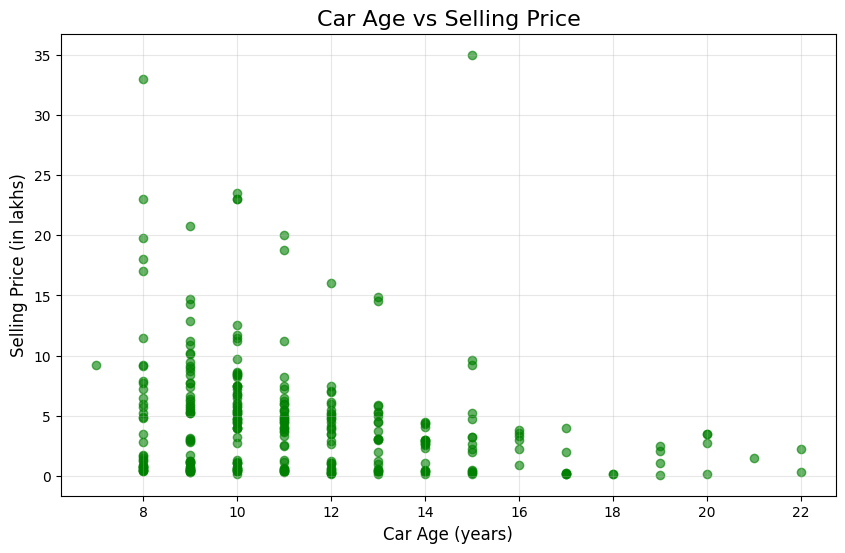

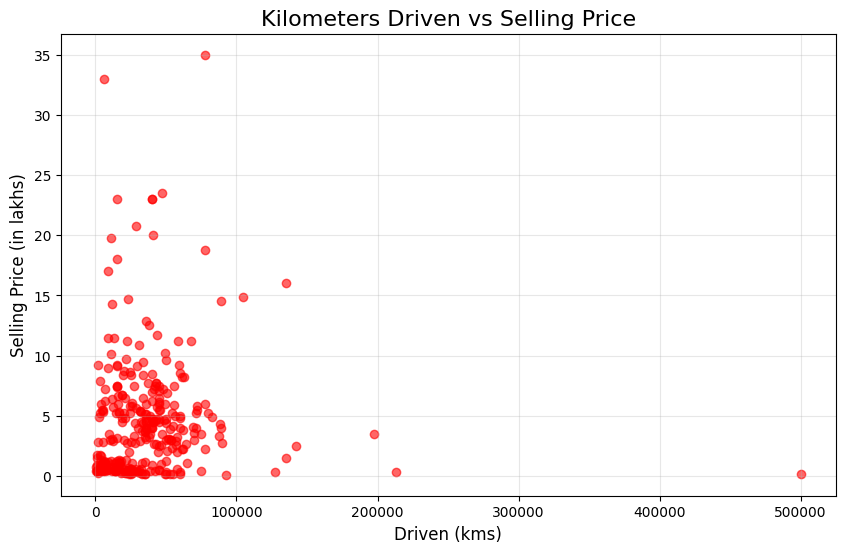

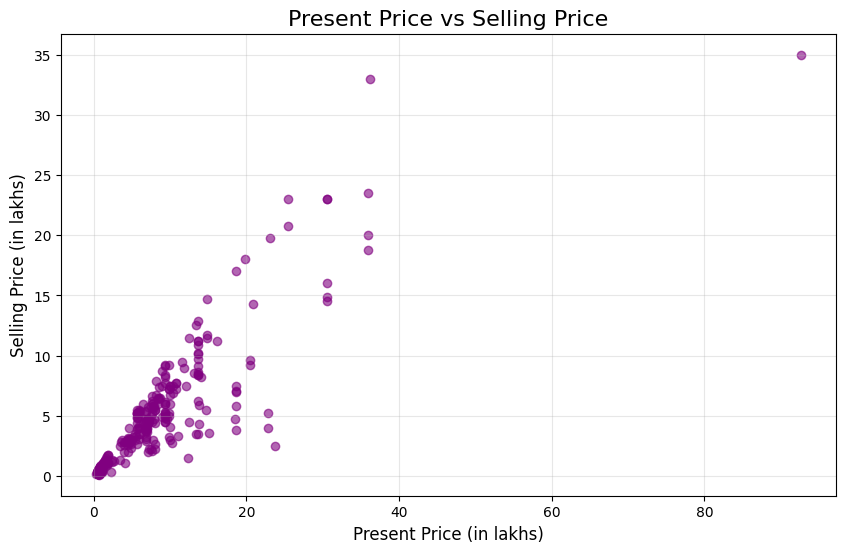

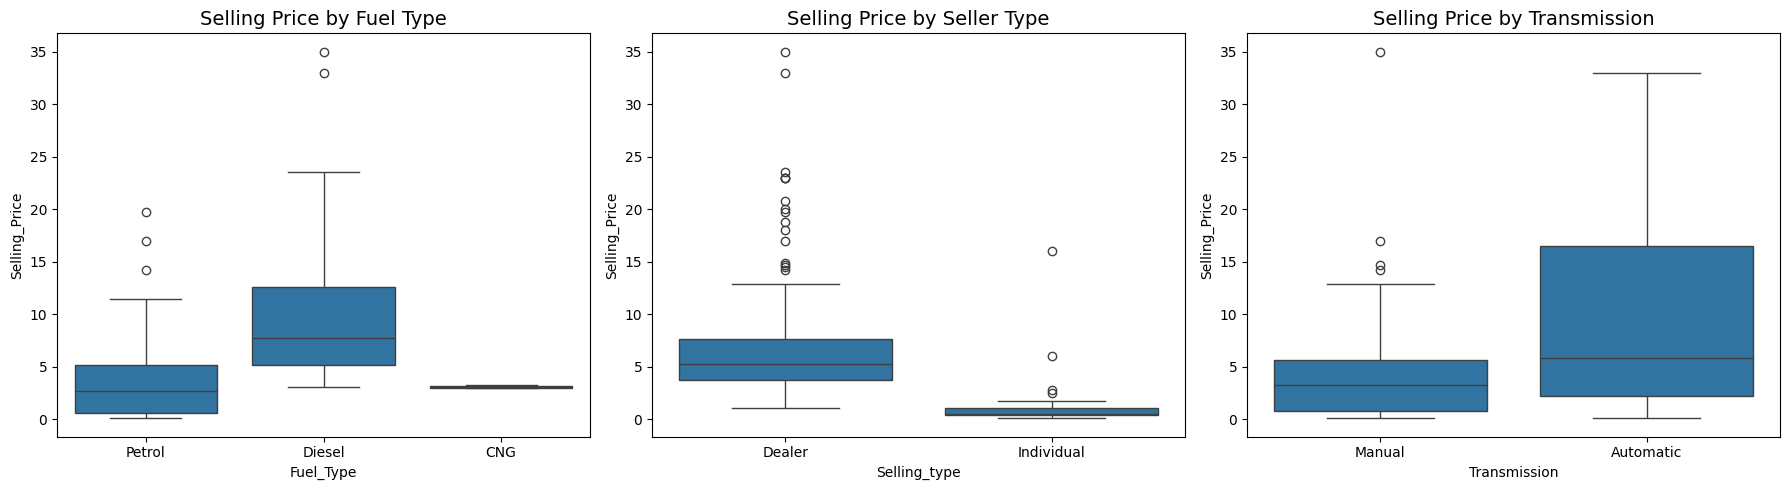


Dataset after preprocessing:
   Selling_Price  Present_Price  Driven_kms  Selling_type  Transmission  \
0           3.35           5.59       27000             0             1   
1           4.75           9.54       43000             0             1   
2           7.25           9.85        6900             0             1   
3           2.85           4.15        5200             0             1   
4           4.60           6.87       42450             0             1   

   Owner  Car_Age  Fuel_Type_Diesel  Fuel_Type_Petrol  
0      0       11             False              True  
1      0       12              True             False  
2      0        8             False              True  
3      0       14             False              True  
4      0       11              True             False  

New shape: (301, 9)

Final columns: ['Selling_Price', 'Present_Price', 'Driven_kms', 'Selling_type', 'Transmission', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


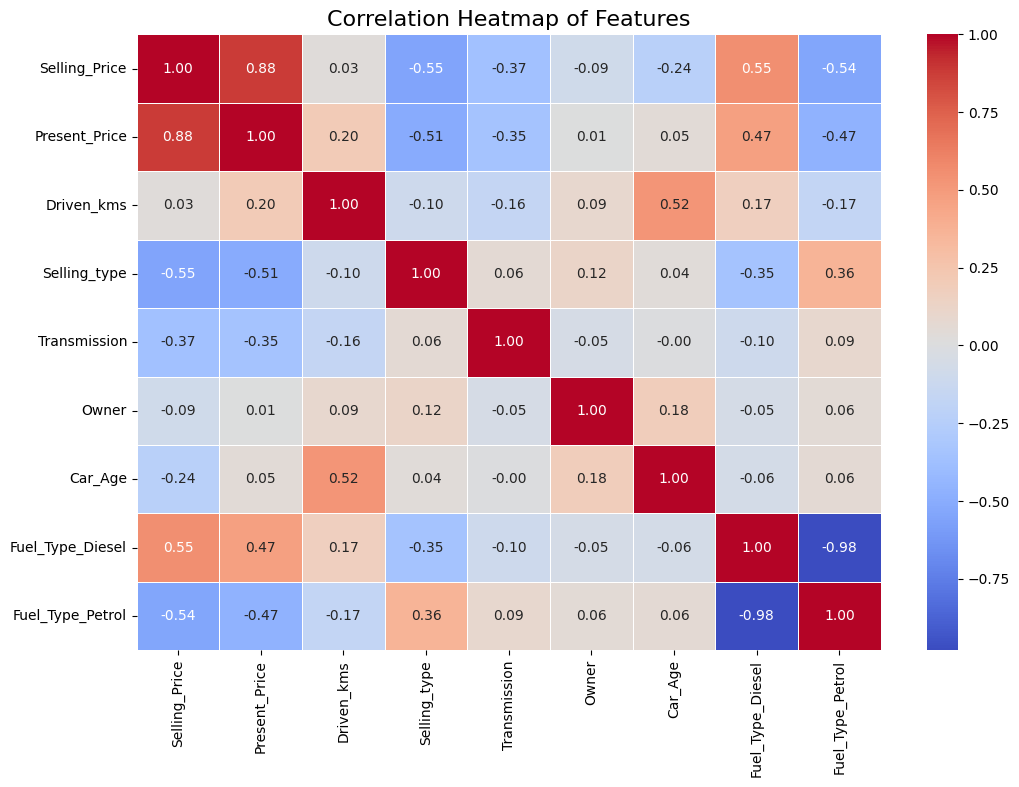


Correlation with Selling Price:
Selling_Price       1.000000
Present_Price       0.878914
Fuel_Type_Diesel    0.552339
Driven_kms          0.029187
Owner              -0.088344
Car_Age            -0.236141
Transmission       -0.367128
Fuel_Type_Petrol   -0.540571
Selling_type       -0.550724
Name: Selling_Price, dtype: float64

Features shape: (301, 8)
Target shape: (301,)

Training set size: (240, 8)
Testing set size: (61, 8)

Data preprocessing complete!

Starting model training...

1. Training Linear Regression...
Linear Regression - R2 Score: 0.8488707839193137

2. Training Ridge Regression...
Ridge Regression - R2 Score: 0.8483973683280701

3. Training Lasso Regression...
Lasso Regression - R2 Score: 0.8444390475164797

4. Training Decision Tree...
Decision Tree - R2 Score: 0.9483555206279581

5. Training Random Forest...
Random Forest - R2 Score: 0.9636914890116812

6. Training Gradient Boosting...
Gradient Boosting - R2 Score: 0.9635692484373712

MODEL EVALUATION RESULTS
      

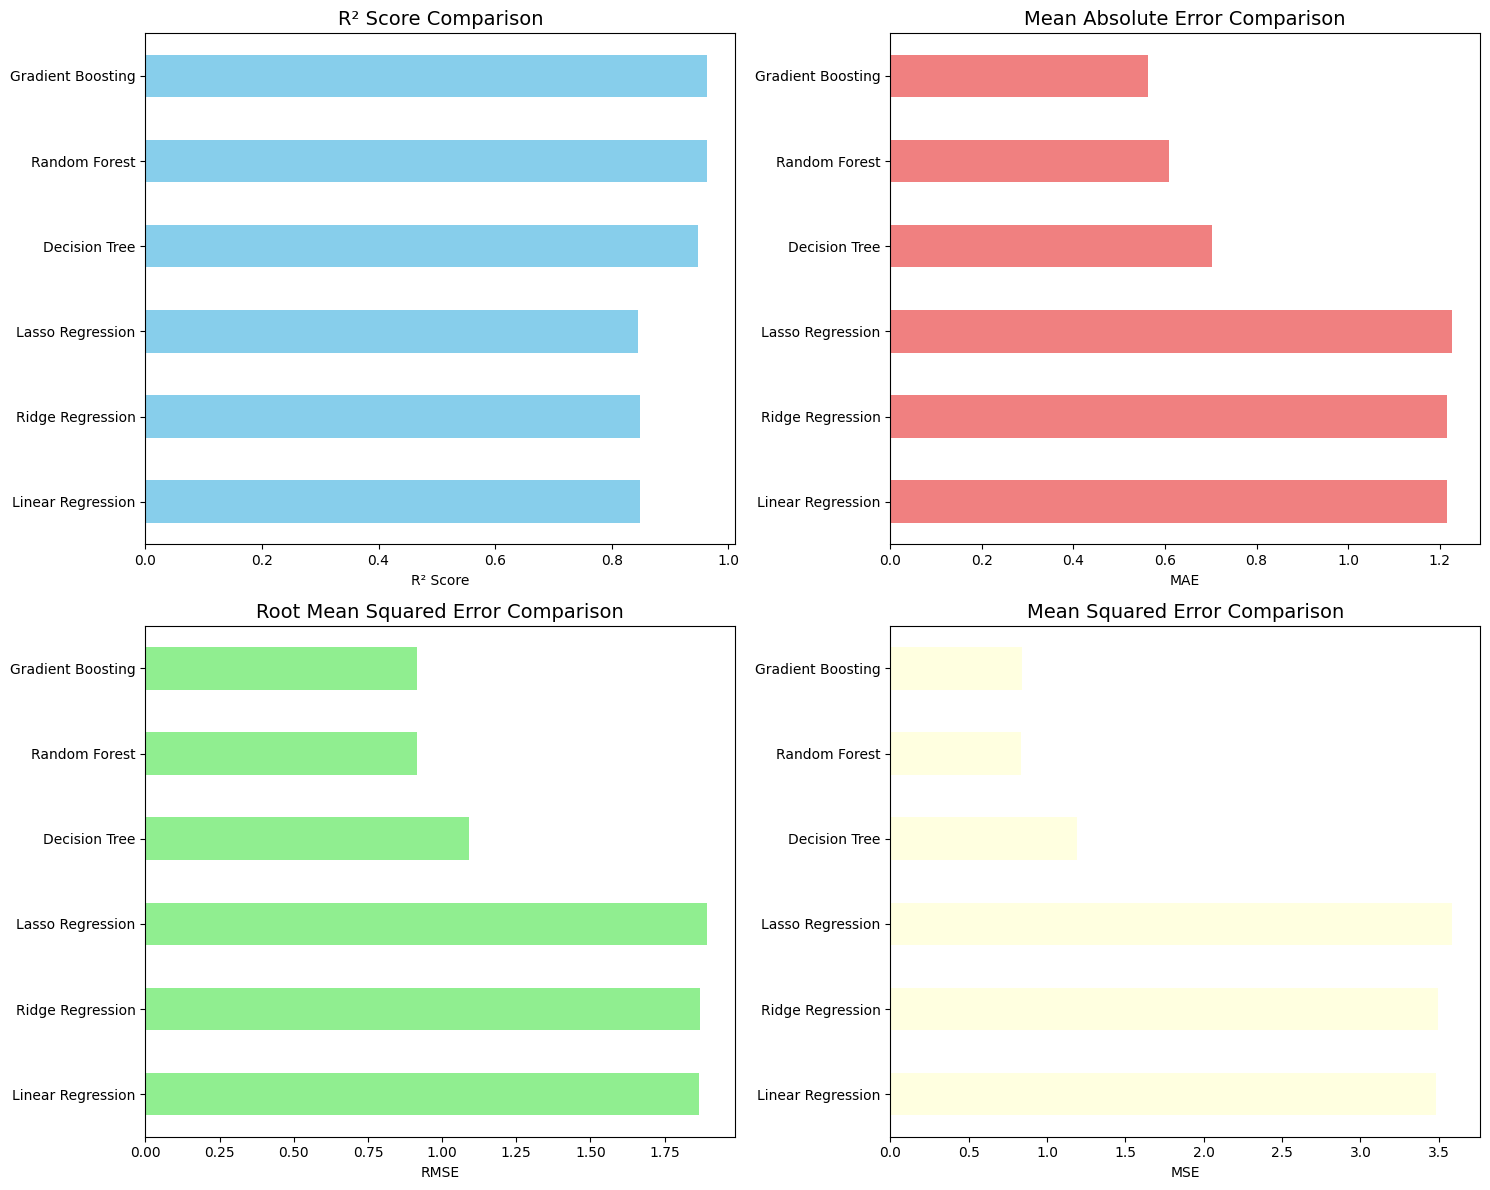

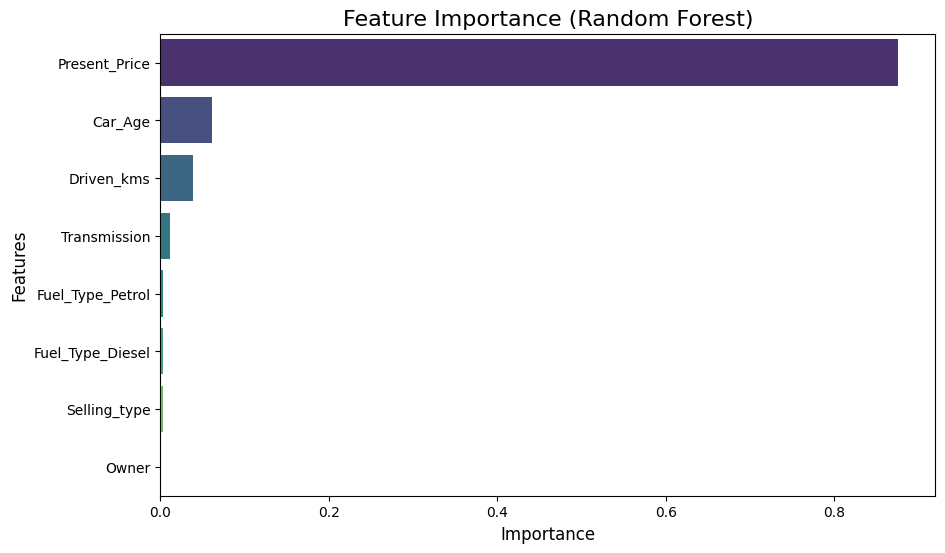


Feature Importance (Random Forest):
            Feature  Importance
0     Present_Price    0.876025
5           Car_Age    0.061617
1        Driven_kms    0.038910
3      Transmission    0.011887
7  Fuel_Type_Petrol    0.003680
6  Fuel_Type_Diesel    0.003407
2      Selling_type    0.003158
4             Owner    0.001316


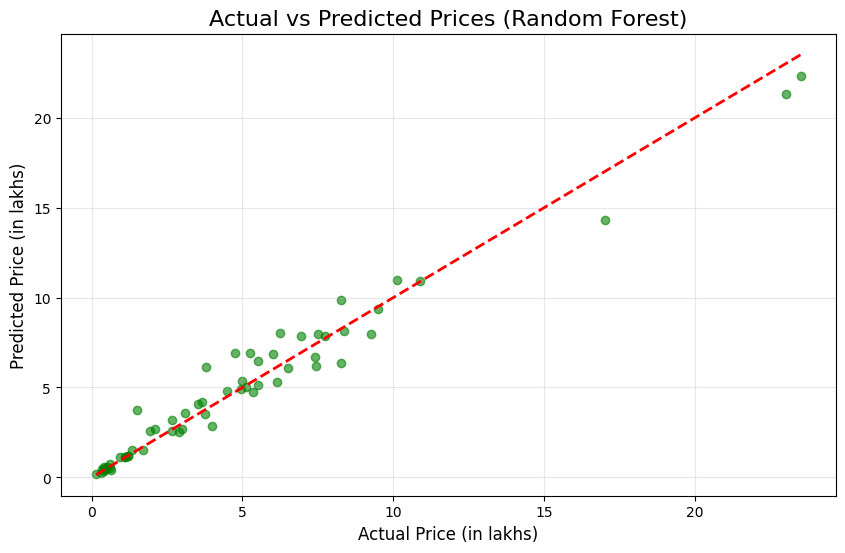

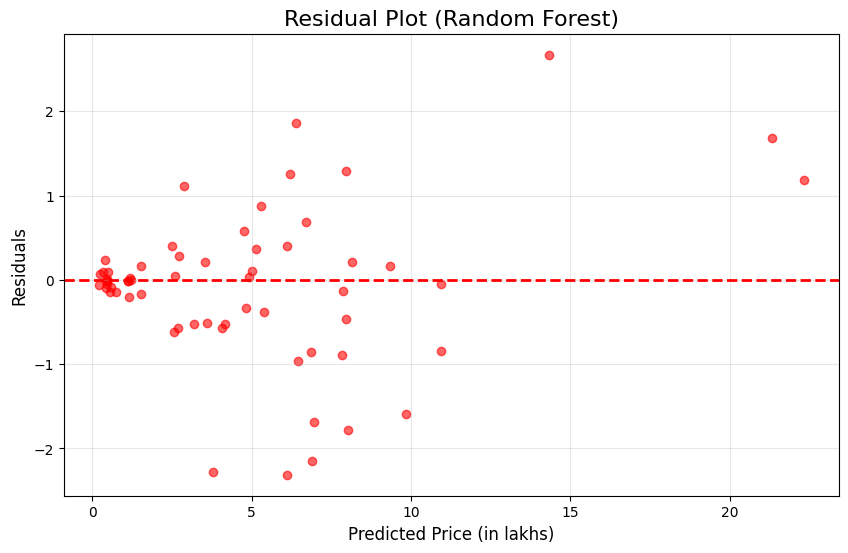

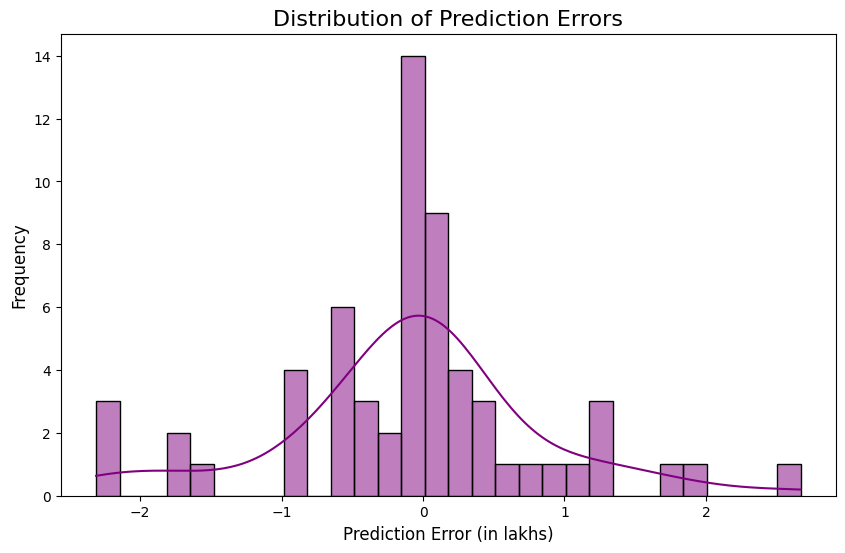


Project Complete!

Key Insights:
1. The best performing model is Random Forest with R² score of 0.9637
2. Most important feature: Present_Price
3. Average prediction error (MAE): 0.61 lakhs


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# load data
data = pd.read_csv('car data.csv')

print("Dataset Overview")
print(data.head())
print("\nDataset shape:", data.shape)
print("\nColumn names:")
print(data.columns.tolist())
print("\nData types:")
print(data.dtypes)

# check missing values
print("\nMissing values:")
print(data.isnull().sum())

# basic statistics
print("\nBasic statistics:")
print(data.describe())


print("\nUnique Fuel Types:", data['Fuel_Type'].unique())
print("Fuel Type counts:")
print(data['Fuel_Type'].value_counts())

print("\nUnique Selling Types:", data['Selling_type'].unique())
print("Selling Type counts:")
print(data['Selling_type'].value_counts())

print("\nUnique Transmissions:", data['Transmission'].unique())
print("Transmission counts:")
print(data['Transmission'].value_counts())

print("\nOwner counts:")
print(data['Owner'].value_counts())

# target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price (in lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Create Car Age feature
current_year = 2025
data['Car_Age'] = current_year - data['Year']

print("\nCar Age statistics:")
print(data['Car_Age'].describe())

#car Age with Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Car_Age'], data['Selling_Price'], alpha=0.6, color='green')
plt.title('Car Age vs Selling Price', fontsize=16)
plt.xlabel('Car Age (years)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Driven kms with Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Driven_kms'], data['Selling_Price'], alpha=0.6, color='red')
plt.title('Kilometers Driven vs Selling Price', fontsize=16)
plt.xlabel('Driven (kms)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

#  Present Price and Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Present_Price'], data['Selling_Price'], alpha=0.6, color='purple')
plt.title('Present Price vs Selling Price', fontsize=16)
plt.xlabel('Present Price (in lakhs)', fontsize=12)
plt.ylabel('Selling Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Box plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, ax=axes[0])
axes[0].set_title('Selling Price by Fuel Type', fontsize=14)

sns.boxplot(x='Selling_type', y='Selling_Price', data=data, ax=axes[1])
axes[1].set_title('Selling Price by Seller Type', fontsize=14)

sns.boxplot(x='Transmission', y='Selling_Price', data=data, ax=axes[2])
axes[2].set_title('Selling Price by Transmission', fontsize=14)

plt.tight_layout()
plt.show()


data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# Label encoding for Selling_type and Transmission
label_encoder = LabelEncoder()
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# Drop unnecessary columns
data = data.drop(columns=['Car_Name', 'Year'])

print("\nDataset after preprocessing:")
print(data.head())
print("\nNew shape:", data.shape)
print("\nFinal columns:", data.columns.tolist())

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

print("\nCorrelation with Selling Price:")
print(correlation_matrix['Selling_Price'].sort_values(ascending=False))

# Separate features and target
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing complete!")
print("\nStarting model training...")

# Dictionary to store model results
results = {}

# 1. Linear Regression
print("\n1. Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

results['Linear Regression'] = {
    'R2 Score': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}
print("Linear Regression - R2 Score:", results['Linear Regression']['R2 Score'])

# 2. Ridge Regression
print("\n2. Training Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

results['Ridge Regression'] = {
    'R2 Score': r2_score(y_test, y_pred_ridge),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge))
}
print("Ridge Regression - R2 Score:", results['Ridge Regression']['R2 Score'])

# 3. Lasso Regression
print("\n3. Training Lasso Regression...")
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

results['Lasso Regression'] = {
    'R2 Score': r2_score(y_test, y_pred_lasso),
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
}
print("Lasso Regression - R2 Score:", results['Lasso Regression']['R2 Score'])

# 4. Decision Tree
print("\n4. Training Decision Tree...")
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

results['Decision Tree'] = {
    'R2 Score': r2_score(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt))
}
print("Decision Tree - R2 Score:", results['Decision Tree']['R2 Score'])

# 5. Random Forest
print("\n5. Training Random Forest...")
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

results['Random Forest'] = {
    'R2 Score': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
}
print("Random Forest - R2 Score:", results['Random Forest']['R2 Score'])

# 6. Gradient Boosting
print("\n6. Training Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

results['Gradient Boosting'] = {
    'R2 Score': r2_score(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb))
}
print("Gradient Boosting - R2 Score:", results['Gradient Boosting']['R2 Score'])

# Display all results
print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)
results_df = pd.DataFrame(results).T
print(results_df)

# Find best model
best_model_name = results_df['R2 Score'].idxmax()
print(f"\nBest Model: {best_model_name}")
print(f"R2 Score: {results_df.loc[best_model_name, 'R2 Score']:.4f}")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

results_df['R2 Score'].plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('R² Score Comparison', fontsize=14)
axes[0, 0].set_xlabel('R² Score')

results_df['MAE'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Mean Absolute Error Comparison', fontsize=14)
axes[0, 1].set_xlabel('MAE')

results_df['RMSE'].plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Root Mean Squared Error Comparison', fontsize=14)
axes[1, 0].set_xlabel('RMSE')

results_df['MSE'].plot(kind='barh', ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Mean Squared Error Comparison', fontsize=14)
axes[1, 1].set_xlabel('MSE')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

print("\nFeature Importance (Random Forest):")
print(feature_importance_rf)

# Actual vs Predicted plot for best model (using Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Random Forest)', fontsize=16)
plt.xlabel('Actual Price (in lakhs)', fontsize=12)
plt.ylabel('Predicted Price (in lakhs)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot (Random Forest)', fontsize=16)
plt.xlabel('Predicted Price (in lakhs)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Prediction Error (in lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("\nProject Complete!")
print("\nKey Insights:")
print(f"1. The best performing model is {best_model_name} with R² score of {results_df.loc[best_model_name, 'R2 Score']:.4f}")
print(f"2. Most important feature: {feature_importance_rf.iloc[0]['Feature']}")
print(f"3. Average prediction error (MAE): {results_df.loc[best_model_name, 'MAE']:.2f} lakhs")